# Exploring Decision Tree Algorithom

Using simple dataset to create a model to predict

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('game data.csv') #df=data frame

In [3]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [4]:
#days column is no longer needed for encoding so we have to drop it
df.drop('Days',axis = 1 ,inplace=True)

In [5]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [ ]:
Encoding the Dataset

Importing Encoder Libary

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
df1 = df.drop('Wear Jacket?',axis=1) 

In [9]:
from pandas.core.dtypes.common import is_numeric_dtype

for col in df1.columns:
    if is_numeric_dtype(df1[col]):
        continue
    
    df1[col] = le.fit_transform(df1[col])

In [10]:
df1.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


# Model Creation

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(df1,df['Wear Jacket?'])

DecisionTreeClassifier()

# Visualization of Tree

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

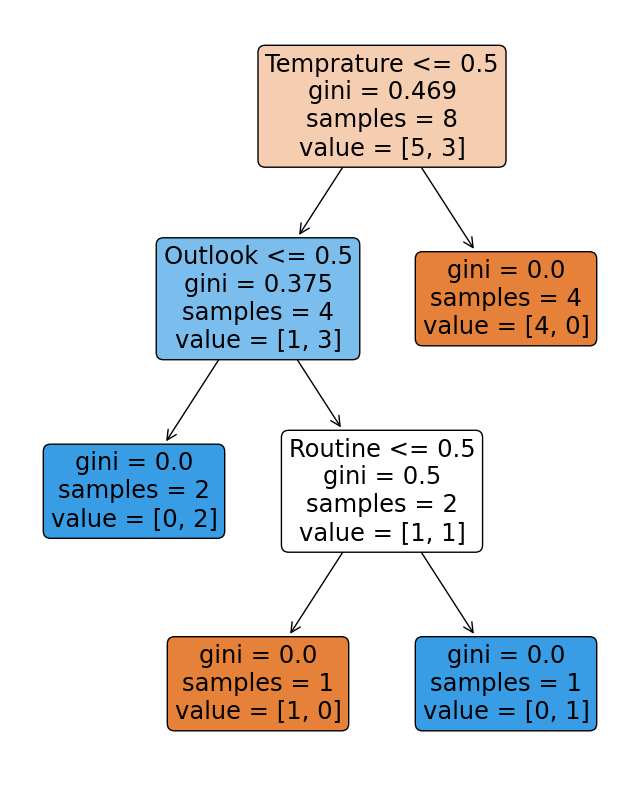

In [15]:
plt.figure(figsize=(8,10))
tree.plot_tree(clf,rounded=True,filled=True,feature_names=df1.columns)

# Prediction Depend on the 3 value

In [16]:
# sunny, cloudy = 1, 0
# cold, warm = 0, 1
# indoor , outdoor = 0,1


import warnings as wr
wr.filterwarnings('ignore')


In [17]:
# sunny,cold,indoor = ?

clf.predict([[1,0,0]])

array(['No'], dtype=object)

In [18]:
#coudy,cold,outdoor = wear jacket ?

clf.predict([[0,0,0]])

array(['Yes'], dtype=object)

In [19]:
#coudy,warm,outdoor = wear jacket ?

clf.predict([[0,1,0]])

array(['No'], dtype=object)